In [1]:
import pandas as pd
import string
import os
import numpy as np
from sqlalchemy import create_engine, text

from utils import DbEngine, Queries
from etl import ETL
from encoder import Encoding

In [30]:
import numpy as np
import sys

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')

### Connect to DB

In [5]:
db_engine = DbEngine(user = 'team77', 
                     password = 'mintic2020.',
                     ip = '172.17.0.3', 
                     port = '5432', 
                     db = 'minjusticia')
engine = db_engine.connect()
queries = Queries(engine)

### Loading original data

In [3]:
data = pd.read_excel('../data/ReincidenciaPospenadosNal201011Junio2020Rev.xlsx', skiprows = 6)

### Execute ETL

In [6]:
etl = ETL(queries)
etl.inmate_static_info(data)
etl.inmate_variable_info(data)

/home/jovyan/work/MinJusticia_team77_DS4A_Project/app/etl.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg['CONDIC_EXPECIONAL'] = data_reg['CONDIC_EXPECIONAL'].fillna('NINGUNO')
/home/jovyan/work/MinJusticia_team77_DS4A_Project/app/etl.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reg['madre_gestante'] = 'NA'
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

### Encode

In [14]:
encoding = Encoding(queries)
data_2_encode = encoding.get_data()
data_encoded = encoding.one_hot(data_2_encode)
data_encoded

,internoen,genero,nacionalidad,reincidente,anio_nacimiento,estado_civil,nivel_educativo,reconocimiento_etnico,diversidad_sexual,extranjero,...,delito_id_delito_172,delito_id_delito_232,delito_id_delito_262,delito_id_delito_other,tentativa_1,tentativa_2,agravado_1,agravado_2,calificado_1,calificado_2
0,FD8EB8482F09C3F5FD085E4CAD29122368A5937B,2,22,2,1985,3,2,5,1,1,...,0,0,0,0,1,0,0,1,0,1
1,7624E0648E28D778D1EE4581998B00C3ABC061DA,2,22,2,1987,3,4,1,1,1,...,0,0,0,1,1,0,1,0,1,0
2,2660D0E0F43523200EF105604266F18D6CA396E5,2,22,2,1973,3,3,5,1,1,...,0,1,0,0,1,0,1,0,1,0
3,00CD632E133B134F4CD3659080F8E5E7C1C7330A,2,22,2,1970,3,3,5,1,1,...,0,0,1,0,1,0,1,0,1,0
4,7790E7531D616FDA7825C9CBB5502DD82DF35EB5,2,22,2,1988,1,5,5,1,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103285,C476DC9C78CBC61BC5A3D27699595E916D90E3E2,2,22,2,1985,6,2,5,1,1,...,0,1,0,0,1,0,1,0,1,0
103286,AEB9E4C6773CBBE7C8424A52AB686E9F14101E73,2,22,2,1985,7,10,5,1,1,...,0,0,0,1,1,0,1,0,1,0
103287,92FBC965E9DE8CE7CD6AF95F4C460AF9A788CF59,2,22,2,1999,6,4,5,1,1,...,0,0,0,0,1,0,0,1,0,1
103288,BE6DD3C2939188AAFE3CD16E971D7F6C2BCEBC73,2,22,2,1978,7,2,5,1,1,...,0,0,0,0,2,0,1,1,1,1


### Unsupervised Learning

Evaluando cantidad de columnas vacias aún

In [19]:
data_encoded.isnull().sum().to_frame().rename(columns={0:'counts'}).sort_values(by='counts', ascending = False)

,counts
fecha_salida,30304
internoen,0
madre_gestante,0
discapacidad,0
adulto_mayor,0
delito_id_delito_42,0
delito_id_delito_102,0
delito_id_delito_103,0
delito_id_delito_105,0
delito_id_delito_109,0


Evaluando qué columnas colo tienen un valor, pues de deben eliminar para el modelin

In [67]:
data_encoded.nunique().sort_values()

situacion_juridica            1
reincidente                   1
municipio_id_municipio        1
estado_id_estado              2
hijos_menores                 2
actividades_enseñanza         2
actividades_trabajo           2
actividades_estudio           2
discapacidad                  2
adulto_mayor                  2
diversidad_sexual             2
genero                        2
extranjero                    2
madre_lactante                3
delito_id_delito_109          3
delito_id_delito_103          3
madre_gestante                3
delito_id_delito_172          3
delito_id_delito_262          4
delito_id_delito_42           4
delito_id_delito_102          4
delito_id_delito_105          5
reconocimiento_etnico         5
delito_id_delito_141          5
delito_id_delito_232          6
estado_ingreso                6
tentativa_2                   7
calificado_2                  7
delito_id_delito_145          8
estado_civil                  8
agravado_2                    8
delito_i

In [74]:
data_encoded['delito_id_delito_172'].unique()

array([0, 1, 2], dtype=uint8)

Eliminando columnas de fechas por ahora, id de inmate y columnas con menos de 2 variables únicas

In [68]:
data = data_encoded.drop(columns = ['internoen',
                                    'fecha_ingreso',
                                    'fecha_salida',
                                    'situacion_juridica',
                                    'reincidente',
                                    'municipio_id_municipio'])

Creando función para llevar a cabo un encoding nuevo, dado que aún hay variables no numéricas en los datos

In [69]:
def encode_transform(data):
    encoders = []
    encoded_cols = []
    for i in range(data.values.shape[1]):
        le = LabelEncoder()
        le.fit(data.values[:,i])
        encoders.append(le)
        encoded_cols.append(le.transform(data.values[:,i]).reshape(-1,1))
    return np.concatenate(encoded_cols, axis = 1), encoders

In [70]:
data_enc, encoders = encode_transform(data)
data_enc

array([[ 1, 21, 59, ...,  1,  0,  1],
       [ 1, 21, 61, ...,  0,  1,  0],
       [ 1, 21, 47, ...,  0,  1,  0],
       ...,
       [ 1, 21, 73, ...,  1,  0,  1],
       [ 1, 21, 52, ...,  1,  1,  1],
       [ 1, 21, 54, ...,  0,  1,  0]])

In [77]:
pd.DataFrame(data_enc).nunique().sort_values()

0       2
20      2
19      2
6       2
7       2
16      2
14      2
11      2
12      2
13      2
28      3
25      3
23      3
17      3
18      3
30      4
21      4
22      4
26      5
5       5
24      5
8       6
29      6
33      7
37      7
27      8
35      8
3       8
31     11
4      12
34     13
32     14
36     16
1      25
15     53
2      76
10     76
9     160
dtype: int64

#### Kmeans

##### Elbow Plot

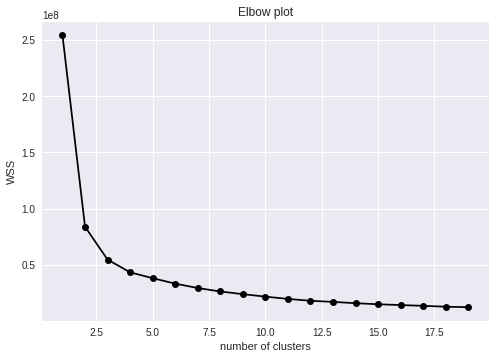

In [71]:
# setting the range of k
clusters = range(1, 20)

# running the clustering 
wss_list = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(data_enc)
    wss_list.append(model.inertia_)

# plotting
_, ax = plt.subplots()
ax.plot(clusters, wss_list, '-o', color='black')
ax.set(title='Elbow plot', 
       xlabel='number of clusters', 
       ylabel='WSS');

#### Prediction Strength

In [79]:
# train/test split
X_train, X_test = train_test_split(data_enc, 
                                   test_size=0.2, 
                                   shuffle=True, 
                                   random_state=42)

In [82]:
def get_closest_centroid(obs, centroids):
    '''
    Function for retrieving the closest centroid to the given observation 
    in terms of the Euclidean distance.
    
    Parameters
    ----------
    obs : array
        An array containing the observation to be matched to the nearest centroid
    centroids : array
        An array containing the centroids
    
    Returns
    -------
    min_centroid : array
        The centroid closes to the obs 
    '''
    min_distance = sys.float_info.max
    min_centroid = 0
    
    for c in centroids:
        dist = distance.euclidean(obs, c)
        if dist < min_distance:
            min_distance = dist
            min_centroid = c
            
    return min_centroid

In [81]:
def get_prediction_strength(k, train_centroids, x_test, test_labels):
    '''
    Function for calculating the prediction strength of clustering
    
    Parameters
    ----------
    k : int
        The number of clusters
    train_centroids : array
        Centroids from the clustering on the training set
    x_test : array
        Test set observations
    test_labels : array
        Labels predicted for the test set
        
    Returns
    -------
    prediction_strength : float
        Calculated prediction strength
    '''
    n_test = len(x_test)
    
    # populate the co-membership matrix
    D = np.zeros(shape=(n_test, n_test))
    for x1, l1, c1 in zip(x_test, test_labels, list(range(n_test))):
        for x2, l2, c2 in zip(x_test, test_labels, list(range(n_test))):
            if tuple(x1) != tuple(x2):
                if tuple(get_closest_centroid(x1, train_centroids)) == tuple(get_closest_centroid(x2, train_centroids)):
                    D[c1,c2] = 1.0
    
    # calculate the prediction strengths for each cluster
    ss = []
    for j in range(k):
        s = 0
        examples_j = x_test[test_labels == j, :].tolist()
        n_examples_j = len(examples_j)
        for x1, l1, c1 in zip(x_test, test_labels, list(range(n_test))):
            for x2, l2, c2 in zip(x_test, test_labels, list(range(n_test))):
                if tuple(x1) != tuple(x2) and l1 == l2 and l1 == j:
                    s += D[c1,c2]
        ss.append(s / (n_examples_j * (n_examples_j - 1))) 

    prediction_strength = min(ss)

    return prediction_strength

In [ ]:
# running the clustering 
strengths = []
for k in clusters:
    model_train = KMeans(n_clusters=k, random_state=42).fit(X_train)
    model_test = KMeans(n_clusters=k, random_state=42).fit(X_test)
    
    pred_str = get_prediction_strength(k, model_train.cluster_centers_, X_test, model_test.labels_)
    strengths.append(pred_str)

# plotting
_, ax = plt.subplots()
ax.plot(clusters, strengths, '-o', color='black')
ax.axhline(y=0.8, c='red');
ax.set(title='Determining the optimal number of clusters', 
       xlabel='number of clusters', 
       ylabel='prediction strength');